In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import osmnx as ox
import networkx as nx
from matplotlib.collections import LineCollection
from shapely.geometry import Point, Polygon, LineString
from os import path, listdir
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

%matplotlib inline



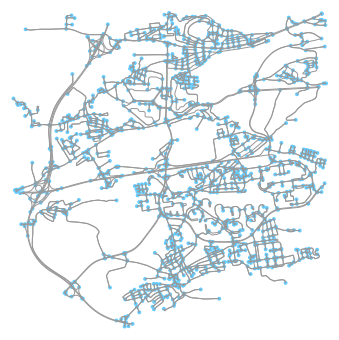

(<Figure size 670.73x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd3bc900240>)

In [2]:
G =ox.graph_from_point((50.053171, 14.310722), distance=3200, network_type='drive')
ox.plot_graph(G)

# ox.plot_graph_folium(G)

In [3]:
nodes, edges = ox.graph_to_gdfs(G, edges=True)
from shapely.geometry import box
bbox = box(*nodes.unary_union.bounds)
print(bbox)

POLYGON ((14.3553892 50.0244106, 14.3553892 50.0819058, 14.2661212 50.0819058, 14.2661212 50.0244106, 14.3553892 50.0244106))


In [4]:
cols = ['time_ms', 'pickup_lat', 'pickup_lon', 'dropoff_lat', 'dropoff_lon']
home = str(Path.home())
trips = pd.read_csv(path.join(home, 'Downloads', 'trips.txt'), 
                 index_col=None, header=None, sep=' ', names=cols)
trips.sort_values(by='time_ms', inplace=True)
trips['hour'] = np.round(trips.time_ms/36e5)
trips = gpd.GeoDataFrame(trips, geometry=gpd.points_from_xy(trips.pickup_lon, trips.pickup_lat))
trips = trips.rename(columns={'geometry': 'p_geometry'}).set_geometry('p_geometry', crs=4326)
trips['d_geometry'] = gpd.points_from_xy(trips.dropoff_lon, trips.dropoff_lat)
trips = trips[trips.apply(lambda r: bbox.contains(r.p_geometry) & bbox.contains(r.d_geometry), axis=1)]
print('%s trips in the selected region' % trips.shape[0])

2932 trips in the selected region


In [82]:
## 
trips_pm = trips[(trips.hour >= 15) & (trips.hour < 18)]
print('nEvening 15 to 18: %s trips.' %   trips_pm.shape[0])

Morning 5 to 8: 864 trips.
Evening 15 to 18: 919 trips.


In [ ]:
lines = [[[G.nodes[u]['x'], G.nodes[u]['y']], [G.nodes[v]['x'], G.nodes[v]['y']]] for u, v, _ in G.edges]

# zlicin, stodulky, luka, lyziny, hurka, motol
metro_coords = np.array([(14.290713, 14.305047, 14.322216, 14.331450, 14.341777, 14.340355),
                         (50.053729, 50.046551, 50.045241, 50.044590, 50.049938, 50.074804)])
#trams and buses
trams = np.array([(14.298416, 14.324080), (50.065280, 50.054859)])# sidliste repy, k hajum
others = np.array([(14.318227, 14.354753), (50.057958, 50.075747)]) # skladiste ikea??, nemocnice na homolce
#metro zlicin, stodulky, luka, lyziny
metro = pd.DataFrame(metro_coords.T, columns=['x', 'y'])
metro = gpd.GeoDataFrame(metro, geometry=gpd.points_from_xy(metro.x, metro.y), crs=4326)

def plot_map(ax):
    lc = LineCollection(lines, linewidths=0.4, colors='lightblue', zorder=1)
    ax.add_collection(lc)
    ax.scatter(*metro_coords, marker="*", s=50, c='red')
    ax.scatter(*trams, marker="*", s=50, c='darkorange')
    ax.scatter(*others, marker="+", s=50, c='orange')


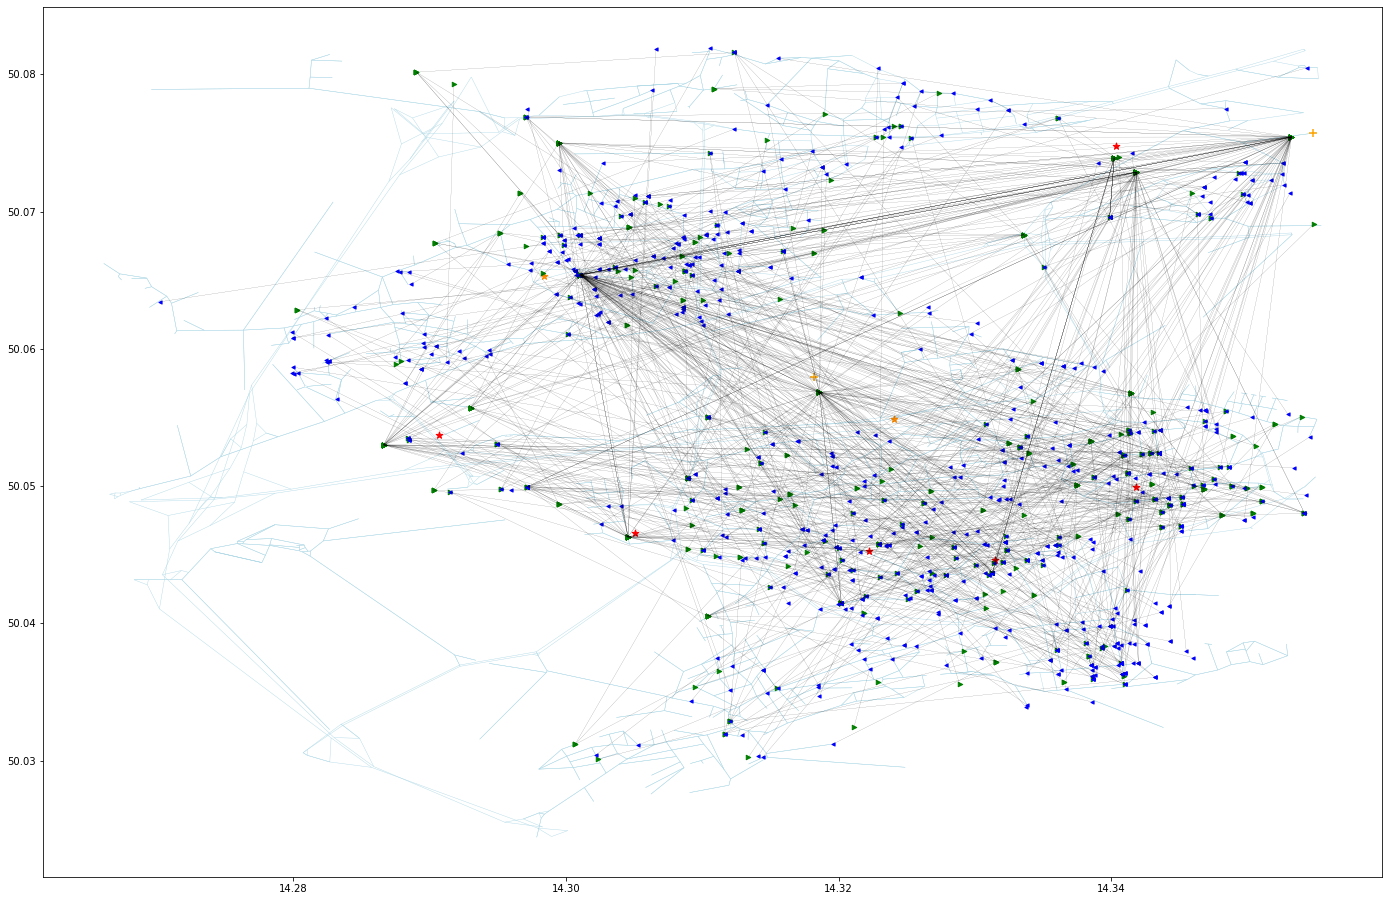

In [115]:
# Work-to-home
fig, axes = plt.subplots(ncols=2, figsize=(24,8))

for ax in axes:
    plot_map(ax)
    ax.autoscale()
ax = axes[0]
ax.set_title('Pickups')
ax.scatter(trips_pm.pickup_lon.values, trips_pm.pickup_lat.values, marker='>', c='green', s=3, label='pickup')
ax = axes[1]
ax.set_title('Dropoffs')
ax.scatter(trips_pm.dropoff_lon.values, trips_pm.dropoff_lat.values, marker='<', c='blue', s=3, label='dropoff')
plt.suptitle('Stodlky, 15:00-18:00')
plt.savefig('stodulky_pm.eps',  box_inches='tight')


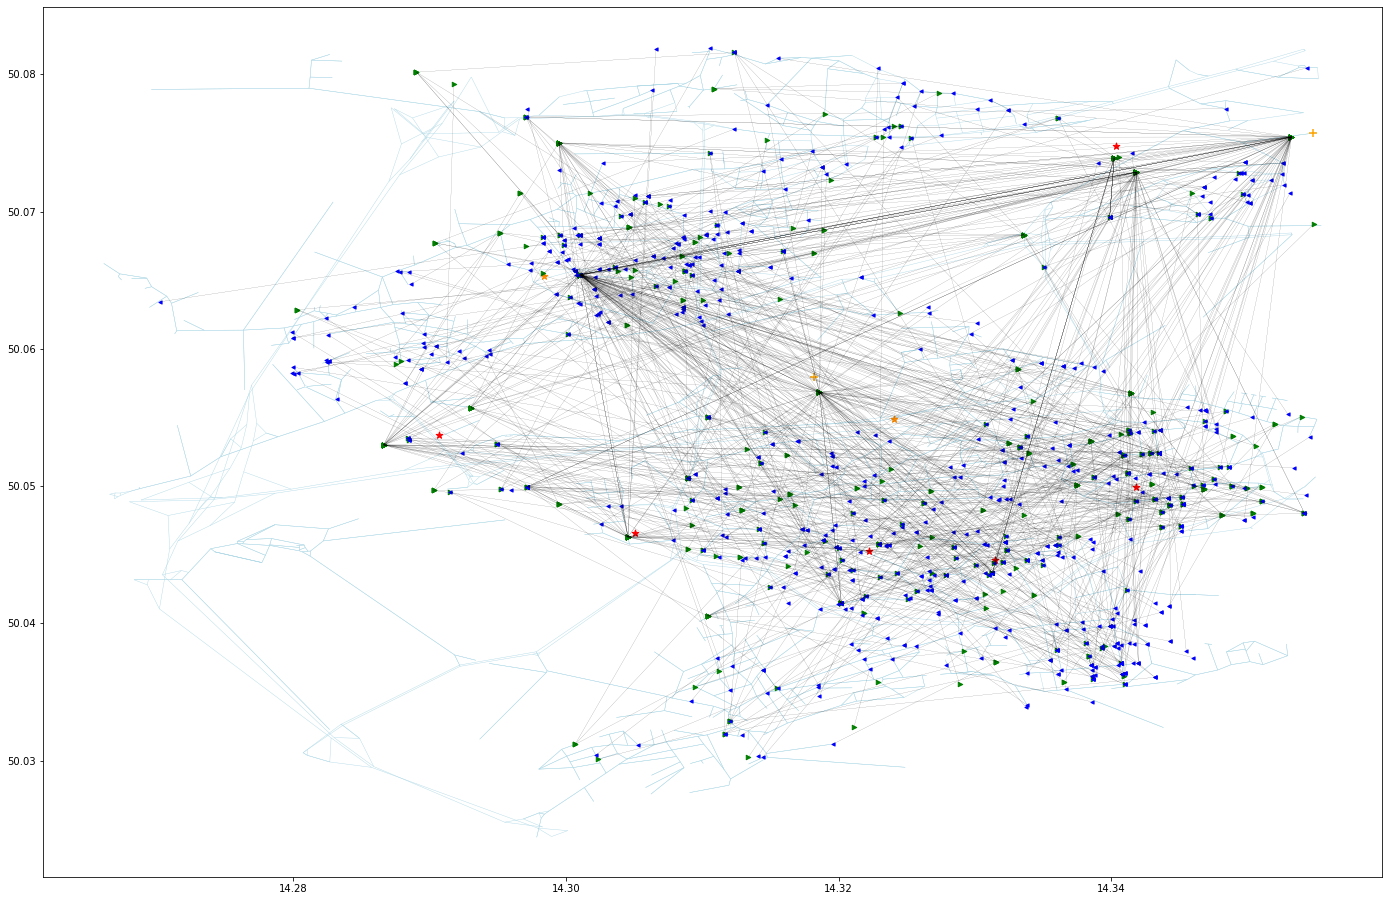

In [126]:
lines1 = np.array([trips_pm.pickup_lon, trips_pm.pickup_lat, 
         trips_pm.dropoff_lon, trips_pm.dropoff_lat]).T
lines1 = [[[l1, l2], [l3, l4]] for l1, l2, l3, l4 in lines1]
lc1 = LineCollection(lines1, linewidths=0.1, colors='black', zorder=2)
fig, ax = plt.subplots(figsize=(24, 16))
plot_map(ax)
ax.add_collection(lc1)
ax.scatter(trips_pm.pickup_lon.values, trips_pm.pickup_lat.values, marker='>', c='green', s=20, label='pickup')
ax.scatter(trips_pm.dropoff_lon.values, trips_pm.dropoff_lat.values, marker='<', c='blue', s=10, label='dropoff')
          
# plt.suptitle('Stodlky, 15:00-18:00')
plt.savefig('stodulky_od.png',  box_inches='tight')

In [ ]:
from scipy.spatial import cKDTree
trips_pm_proj = trips_pm.set_geometry('p_geometry', crs=4326).to_crs(epsg=3310)
metro_proj = metro.to_crs(epsg=3310)
tree_p = cKDTree(np.array(list(zip(trips_pm_proj.p_geometry.x, trips_pm_proj.p_geometry.y))))


[[166.8296639  172.71696167 274.10026611 274.10026611 274.10026611
  274.10026611 274.10026611 274.10026611 274.10026611 274.10026611
  274.10026611 274.10026611 274.10026611 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 322.01048314
  322.01048314 322.01048314 438.3417876  438.3417876  438.3417876 ]
 [ 46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.002

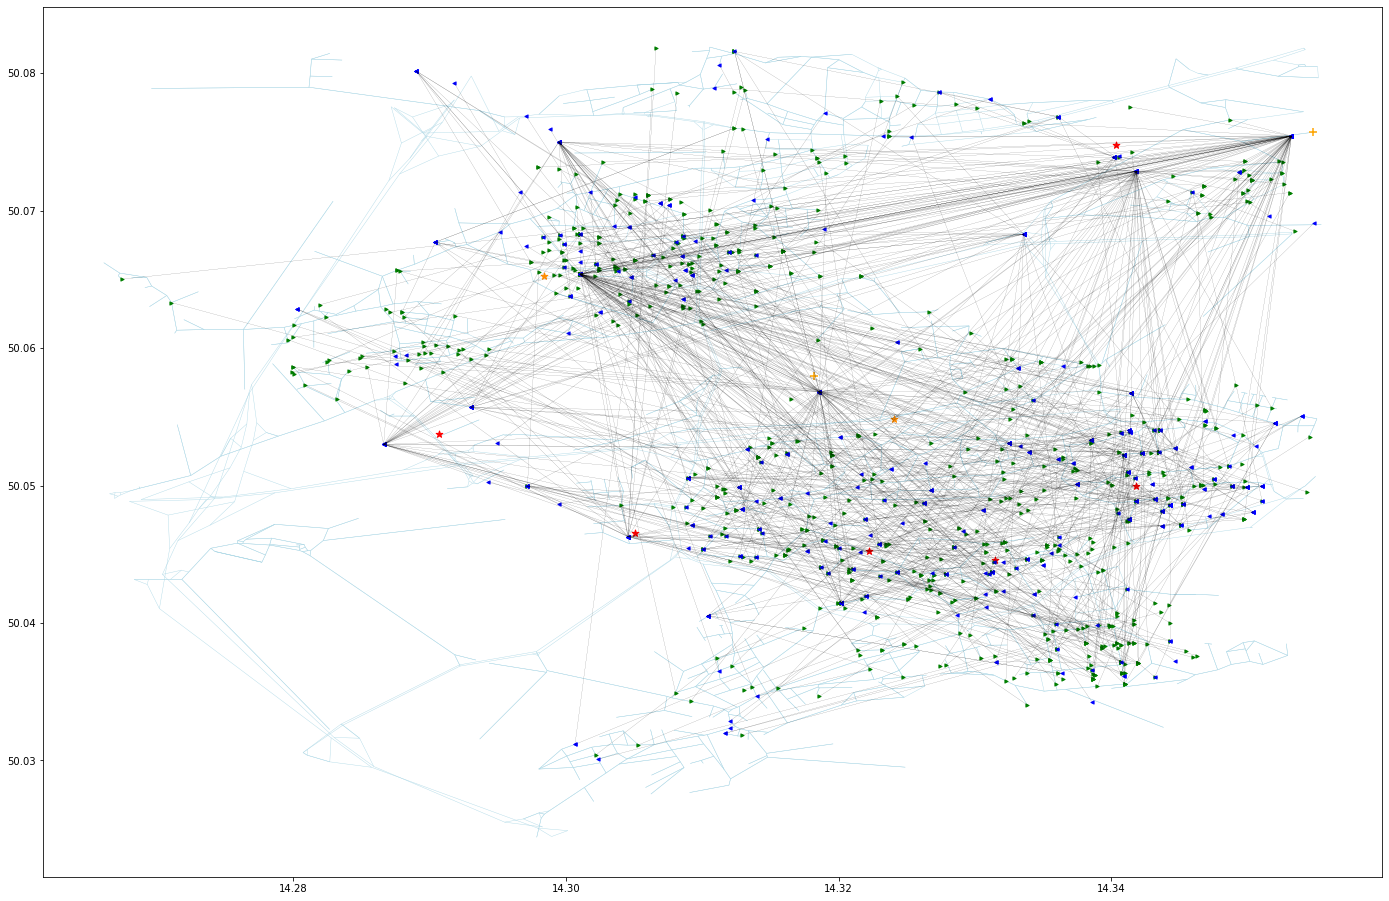

In [80]:

dist, idx = tree_p.query(np.array([metro_proj.geometry.x, metro_proj.geometry.y]).T, k=100, distance_upper_bound=)
print(dist)


[[166.8296639  172.71696167 274.10026611 274.10026611 274.10026611
  274.10026611 274.10026611 274.10026611 274.10026611 274.10026611
  274.10026611 274.10026611 274.10026611 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 310.47790219
  310.47790219 310.47790219 310.47790219 310.47790219 322.01048314
  322.01048314 322.01048314 438.3417876  438.3417876  438.3417876 ]
 [ 46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.00201731
   46.00201731  46.00201731  46.00201731  46.00201731  46.002

In [ ]:
coords = np.array([trips_pm_proj.geometry.x, trips_pm_proj.geometry.y]).T
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(coords)
centroids = kmeans.cluster_centers_

points['centroid_label'] = kmeans.labels_
centroids_df = pd.DataFrame(np.array([range(len(centroids)), centroids.T[0], centroids.T[1]]).T,
        columns=['label', 'x', 'y'])
centroids_df['label'] = centroids_df.label.apply(int)